# Customizing QuickPlot

This notebook shows how to customize PyBaMM's `QuickPlot`, using matplotlib's [style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

First we define and solve the models

In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm

models = [pybamm.lithium_ion.SPM(), pybamm.lithium_ion.SPMe(), pybamm.lithium_ion.DFN()]
sims = []
for model in models:
    sim = pybamm.Simulation(model)
    sim.solve([0, 3600])
    sims.append(sim)

ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


Call the default plots

In [2]:
pybamm.dynamic_plot(sims);

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Using style sheets

The easiest way to customize style is to use one of matplotlib's available style sheets

In [3]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'russian-font',
 'sans',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'turkish-font',
 'vibrant']

For example we can use the ggplot style from R. In this case, the title fonts are quite large, so we reduce the number of words in a title before a line break

In [4]:
plt.style.use("ggplot")
pybamm.settings.max_words_in_line = 3
pybamm.dynamic_plot(sims);

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Another good set of style sheets for scientific plots is available by pip installing the [SciencePlots](https://github.com/garrettj403/SciencePlots) package

## Further customization using rcParams

Sometimes we want further customization of a style, without needing to edit the style sheets. For example, we can update the font sizes and plot again.

To change the line colors, we use `cycler`

In [5]:
import matplotlib as mpl
from cycler import cycler

mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 12
mpl.rcParams["xtick.labelsize"] =  12
mpl.rcParams["ytick.labelsize"] =  12
mpl.rcParams["legend.fontsize"] =  12
mpl.rcParams["axes.prop_cycle"] = cycler('color', ["k", "g", "c"])
pybamm.dynamic_plot(sims);

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Very fine customization

Some customization of the `QuickPlot` object is possible by passing arguments - see the [docs](https://pybamm.readthedocs.io/en/latest/source/api/plotting/quick_plot.html) for details

We can also further control the plot by calling `plot.fig` after the figure has been created, and editing the matplotlib objects. For example, here we move the titles to the ylabel, and move the legend.

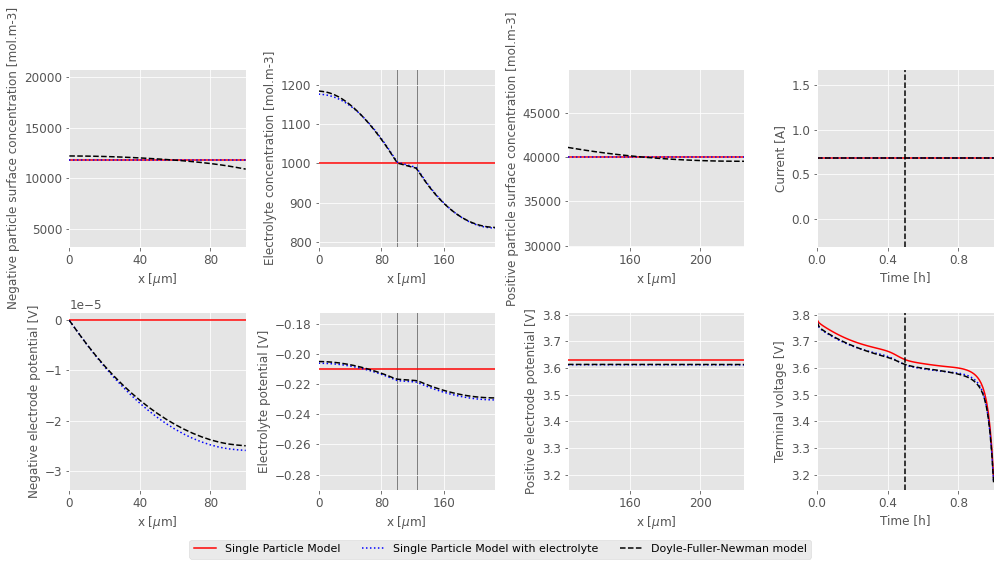

In [6]:
pybamm.settings.max_words_in_line = 4

plot = pybamm.QuickPlot(sims, figsize=(14,7))
plot.plot(0.5); # time in hours

# Move title to ylabel
for ax in plot.fig.axes:
    title = ax.get_title()
    ax.set_title("")
    ax.set_ylabel(title)
    
# Remove old legend and add a new one in the bottom
leg = plot.fig.get_children()[-1]
leg.set_visible(False)
plot.fig.legend(plot.labels, loc="lower center", ncol=len(plot.labels), fontsize=11)

# Adjust layout
plot.gridspec.tight_layout(plot.fig, rect=[0, 0.04, 1, 1])

The figure can then be saved using `plot.fig.savefig`

## References

The relevant papers for this notebook are:

In [ ]:
pybamm.print_citations()